<a href="https://colab.research.google.com/github/msa1997/ads-2023/blob/main/ADS_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#New

In [37]:
!pip uninstall scikit-learn
!pip install scikit-learn


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import sklearn
from scipy.io import loadmat
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Digits dataset is a copy of the test set of the [UCI ML hand-written digits datasets](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) and the characteristics of the dataset is as below:

* #Classes: 10

* #Samples per class: ~180

* #Total samples: 1797

* Dimensionality: 64

* Features: integers 0-16

In this section we load dataset using `sklearn dataset` and explore it.

In [2]:
# Loading  dataset
from sklearn.datasets import load_digits
mnist = load_digits()

In [3]:
#separating the features and the label
X = mnist.data
y = mnist.target

Let's see some of the images:

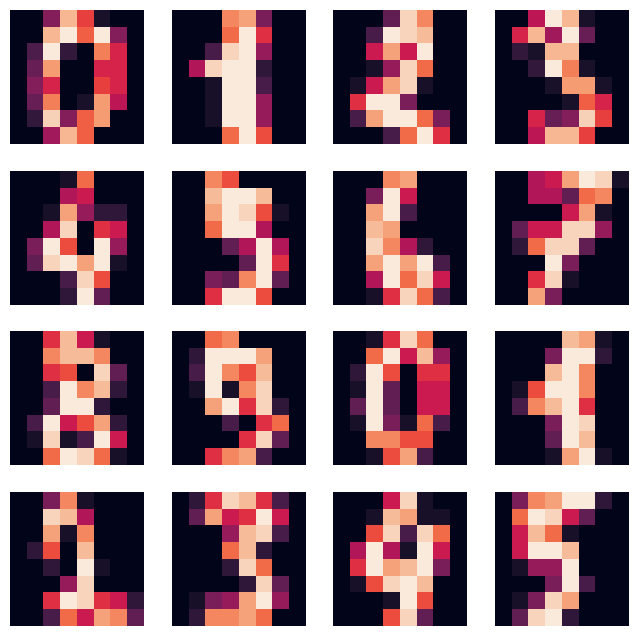

In [4]:
random_samples = np.random.choice(len(X), 16)
plt.figure(figsize=(8,8))
for i, sample in enumerate(random_samples):
  plt.subplot(4,4,1+i)
  plt.imshow(X[i].reshape(8,8))
  plt.axis('off')


Text(0.5, 1.0, 'distribution of labels')

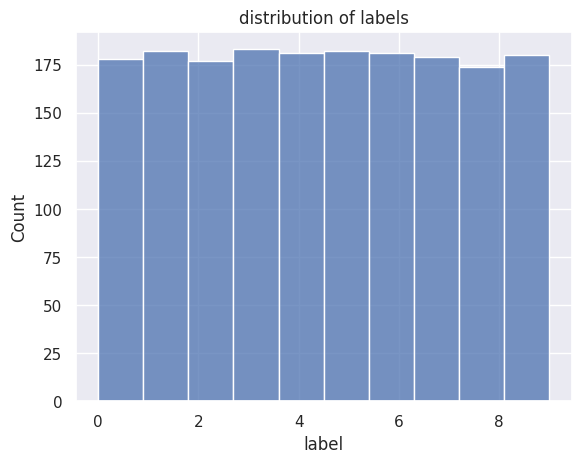

In [5]:
sns.histplot(y, bins=10)
plt.xlabel('label')
plt.title('distribution of labels')

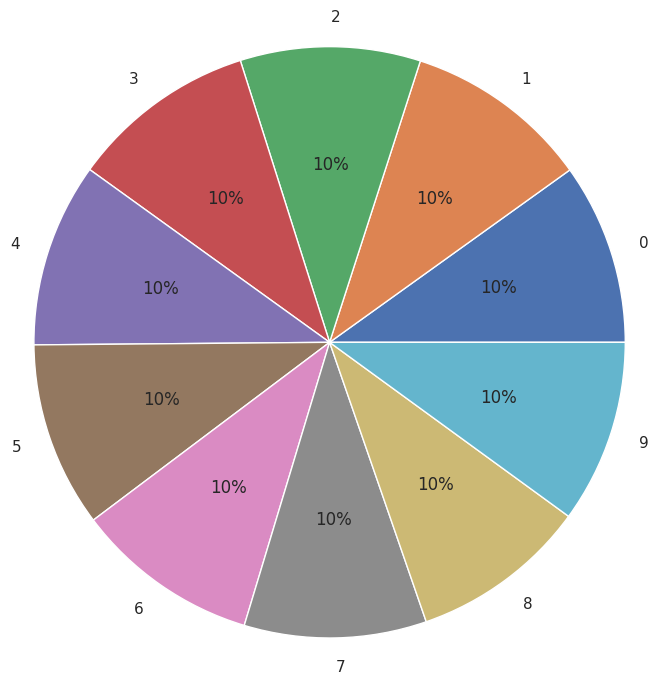

In [6]:
plt.pie(np.unique(y, return_counts=True)[1], labels=list(range(10)),autopct='%1.0f%%', radius=2)
plt.show()


As you can see samples are evenly distributed across classes.

Before fitting the model, we normalize the data so that each image has a mean and std equal to zero and one, respectively.

In [7]:
mean = np.mean(X, axis=1, keepdims=True)
std = np.std(X, axis=1, keepdims=True)
X = (X - mean)/std

In [8]:
#spliting dataset into train and test dataset (we keep 30% of data for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("train size is: ",X_train.shape, y_train.shape)
print("test size is: ",X_test.shape, y_test.shape)

train size is:  (1437, 64) (1437,)
test size is:  (360, 64) (360,)


# Logistic Regression

What we do in this section is to flatten images and then feed each image as a vector with size $64$ to a logistic regression model and train it, as illustrated in the image below (note that the MNIST dataset's images are $28*28$ so after flattening their size are 784 but our's are $8*8 = 64$):

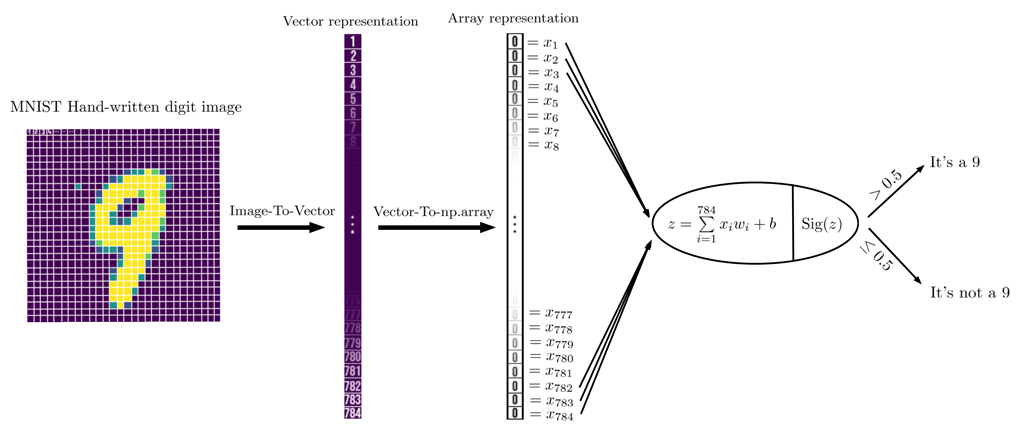

Since our dataset is already flattened, we go straight to the training step.

## OVR technique
We do the classification with One vs Rest technique.
In this technique a separate model is trained for each class predicted whether an observation is that class or not.

In [9]:
# Diable warnings about max_itr not reached etc.!
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [10]:
#creating and training the logistic model
from sklearn.linear_model import LogisticRegression
model_LR_OVR = LogisticRegression(penalty='none',max_iter=400,multi_class='ovr')
model_LR_OVR.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='ovr', penalty='none')

In [11]:
# predicting the labels for test set  and calculating the score
predictions_OVR = model_LR_OVR.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions_OVR, average='macro'))

Macro F1-score is 0.93


In [12]:
pip install --upgrade scikit-learn

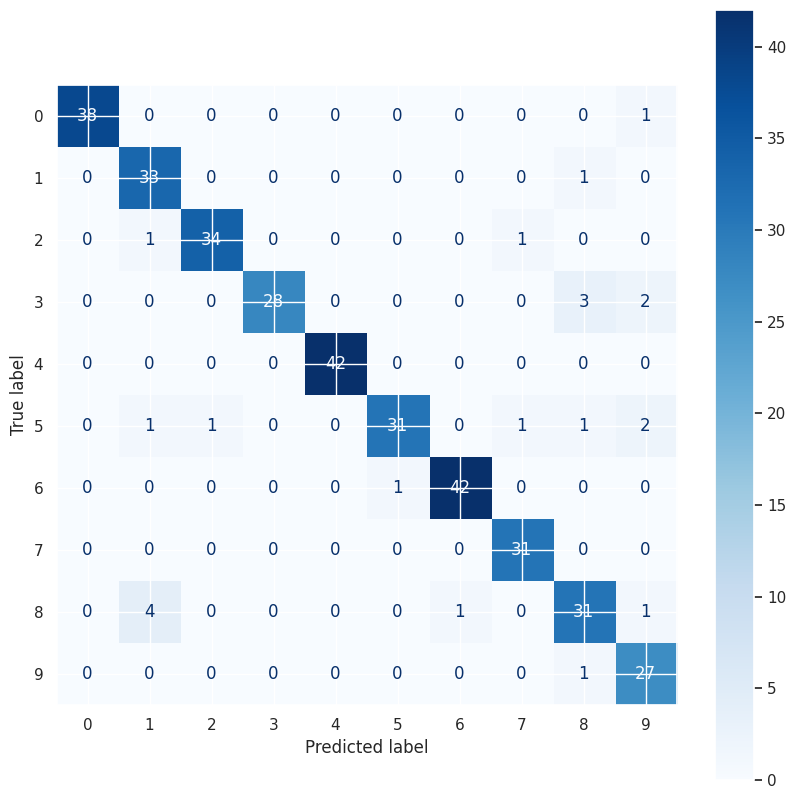

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 10))

# Assuming model_LR_OVR.predict(X_test) is the predicted values
cm = confusion_matrix(y_test, model_LR_OVR.predict(X_test))

# Using ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_LR_OVR.classes_)
disp.plot(ax=ax, cmap='Blues')

plt.show()


According to the confusion matrix, the model predicts almost all labels correctly resulting in a high F1 score. for several samples, the model confused digit 3 with digits 8 and 9 which are similar to 3. the most distinctive digit for the model is 7 which model predicts all the samples of this class correctly.

## Multinomial Approach

The main difference between this model and OVR occurs in the modeling assumptions behind them, while OVR assumes that there are 10 independent classification problems, one for each class, and trained them independently of the other $K-1$ logistic regression problems,  the assumption behind multi is that there is a multinomial conditional distribution, such that for a class $i$ we have the following logistic model  $\frac{exp(−𝛽^𝑇_𝑖𝐱)}{\sum^𝐾_{𝑗=1}exp(−𝛽^𝑇_𝑗𝐱)}$. As you can see immediately, learning  $𝛽𝑖$ for a particular class $i$ immediately affects our model for other classes $j$ through the joint model.

In [14]:
#creating and training the logistic model
model_LR_multi = LogisticRegression(penalty='none',max_iter=400,multi_class='multinomial')
model_LR_multi.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='multinomial', penalty='none')

In [15]:
# predicting the labels for test set and calculating the score
predictions_multi = model_LR_multi.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions_multi, average='macro'))

Macro F1-score is 0.97


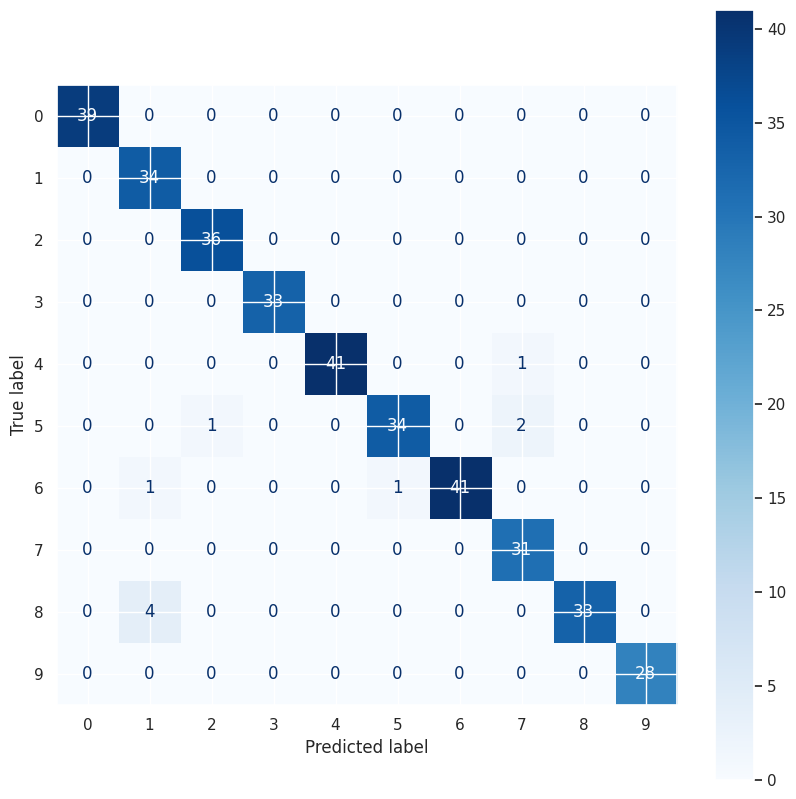

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 10))

# Assuming model_LR_multi.predict(X_test) is the predicted values
cm = confusion_matrix(y_test, model_LR_multi.predict(X_test))

# Using ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_LR_multi.classes_)
disp.plot(ax=ax, cmap='Blues')

plt.show()


As results show this technique works better than one-ve-Rest. Since the results are already good enough we do not try regularization. Since OVR trained each model independently of the other classes and multi consider all the classes in training the model, I guess confusing two classes have more effect on the loss so it works better.

## Calculate log loss

We use model.predict_proba to get the probabilities for each class and be able to calculate log loss wich is same as cross entropy:

$J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m y^{(i)} \log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1-h_\theta(x^{(i)})) \right].$

In [17]:
pred = model_LR_multi.predict_proba(X_test)
log_loss = sklearn.metrics.log_loss(y_test, pred)
print('Log loss is %.2f' %log_loss)


Log loss is 0.66


#Multiclass SVM

In [18]:
from sklearn.svm import SVC
model = SVC(C=2,kernel='rbf',decision_function_shape = "ovr",max_iter=5000)    # C > 0 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

# Predict the results
predictions = model.predict(X_test)

# Evaluate the score
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.99


A Confusion matrix could help us see which classes are being misclassified most:

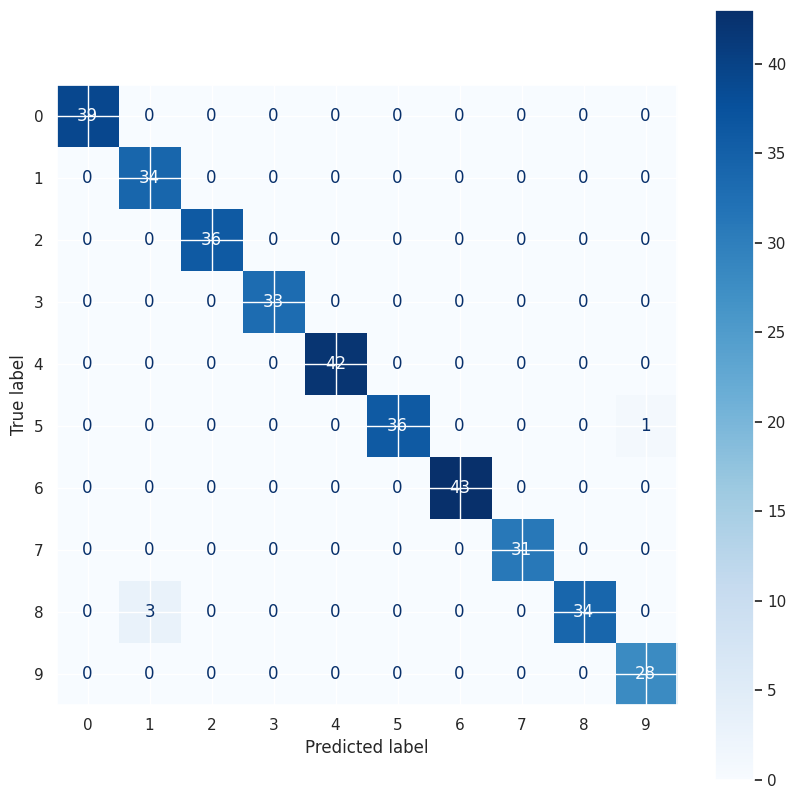

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 10))

# Assuming model.predict(X_test) is the predicted values
cm = confusion_matrix(y_test, model.predict(X_test))

# Using ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax, cmap='Blues')

plt.show()


#Multiclass KNN

We set the weights='distance' to cluster points based on the euclidian distance between them. For this step, we go with default value for number of neighbors, which is 5, and at the next step, we try to tune this number to obtian the best performance.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(weights='distance')
model_KNN.fit(X_train, y_train)
predictions_KNN = model_KNN.predict(X_test)
print('Macro F1-score on Training set is %.2f' %f1_score(y_test, predictions_KNN, average='macro'))

Macro F1-score on Training set is 0.98


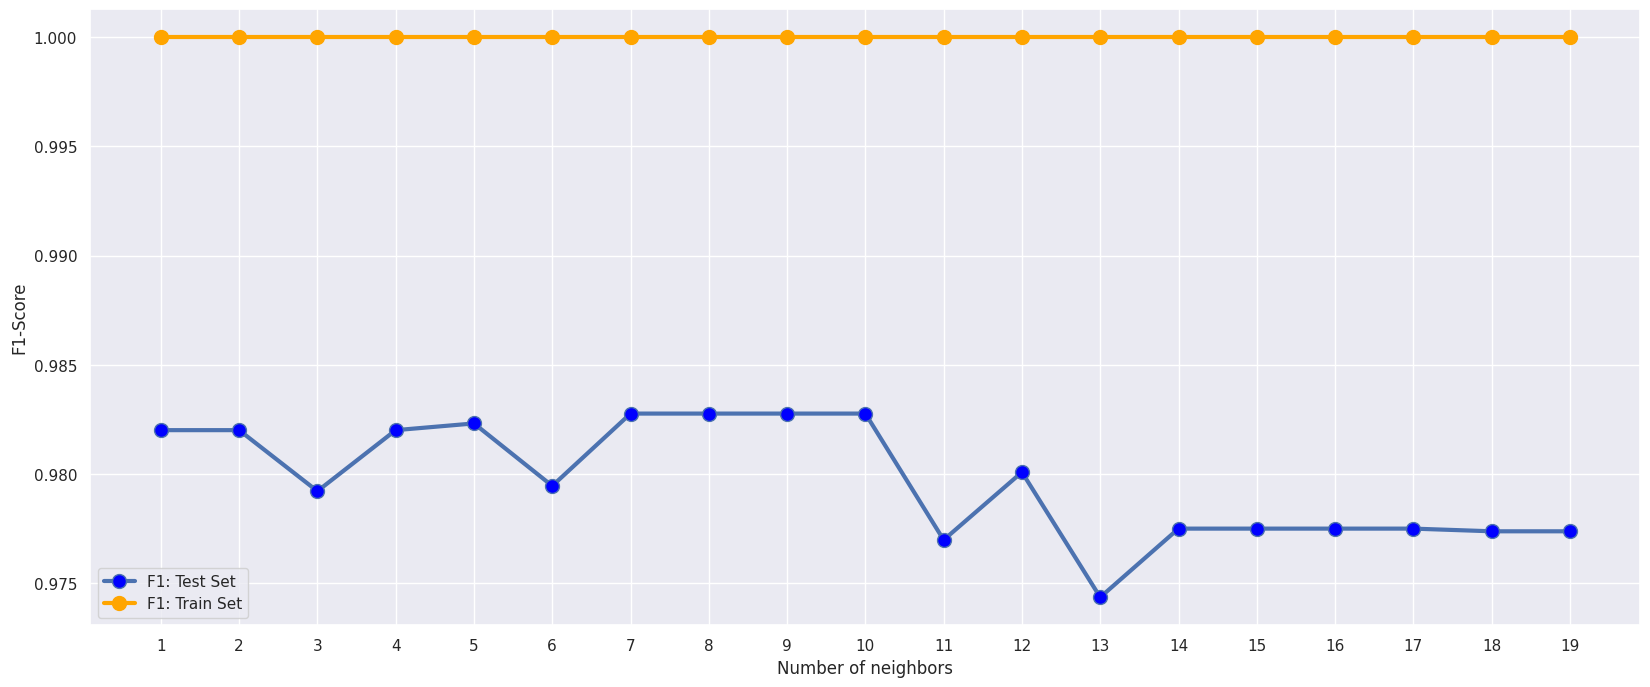

In [21]:
scores = []
neighbors_list = range(1,20)
scores = []
scores_train = []
for n in neighbors_list:

    # Create the model
    model = KNeighborsClassifier(n_neighbors=n,weights='distance')
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(neighbors_list,scores,lw=3,  marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(neighbors_list,scores_train,lw=3,color='orange', marker='o', markersize=10)
plt.xlabel('Number of neighbors')
plt.ylabel('F1-Score')
plt.xticks(list(range(1,20)))
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


Apparently, the 7-10 neighbors equally yield the best result, so we choose 8 as the #neighbors. It is worth saying that the differences are very subtle such that the F1_score is ~0.98 for all the #neighbors <= 13. After that, the performance continuously dropped. As you can see, the F1 score for training data is always 1.

Again, I would like to stress that the result may differ for a new run since we split the dataset to train and test sets randomly.

In [22]:
model = KNeighborsClassifier(n_neighbors=10,weights='distance')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Macro F1-score on Training set is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score on Training set is 0.98


# Multiclass Decision Tree

In [23]:
# model implimentation
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion='gini',max_depth=10)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

I notices that (since the number of feature is high) the deeper the model the better the results, so I choose 10 as the `max-depth`.

In [24]:
# prediction and calculating score
predictions_DT = model_DT.predict(X_train)
print('Macro F1-score on Training set is %.2f' %f1_score(y_train, predictions_DT, average='macro'))

Macro F1-score on Training set is 0.97


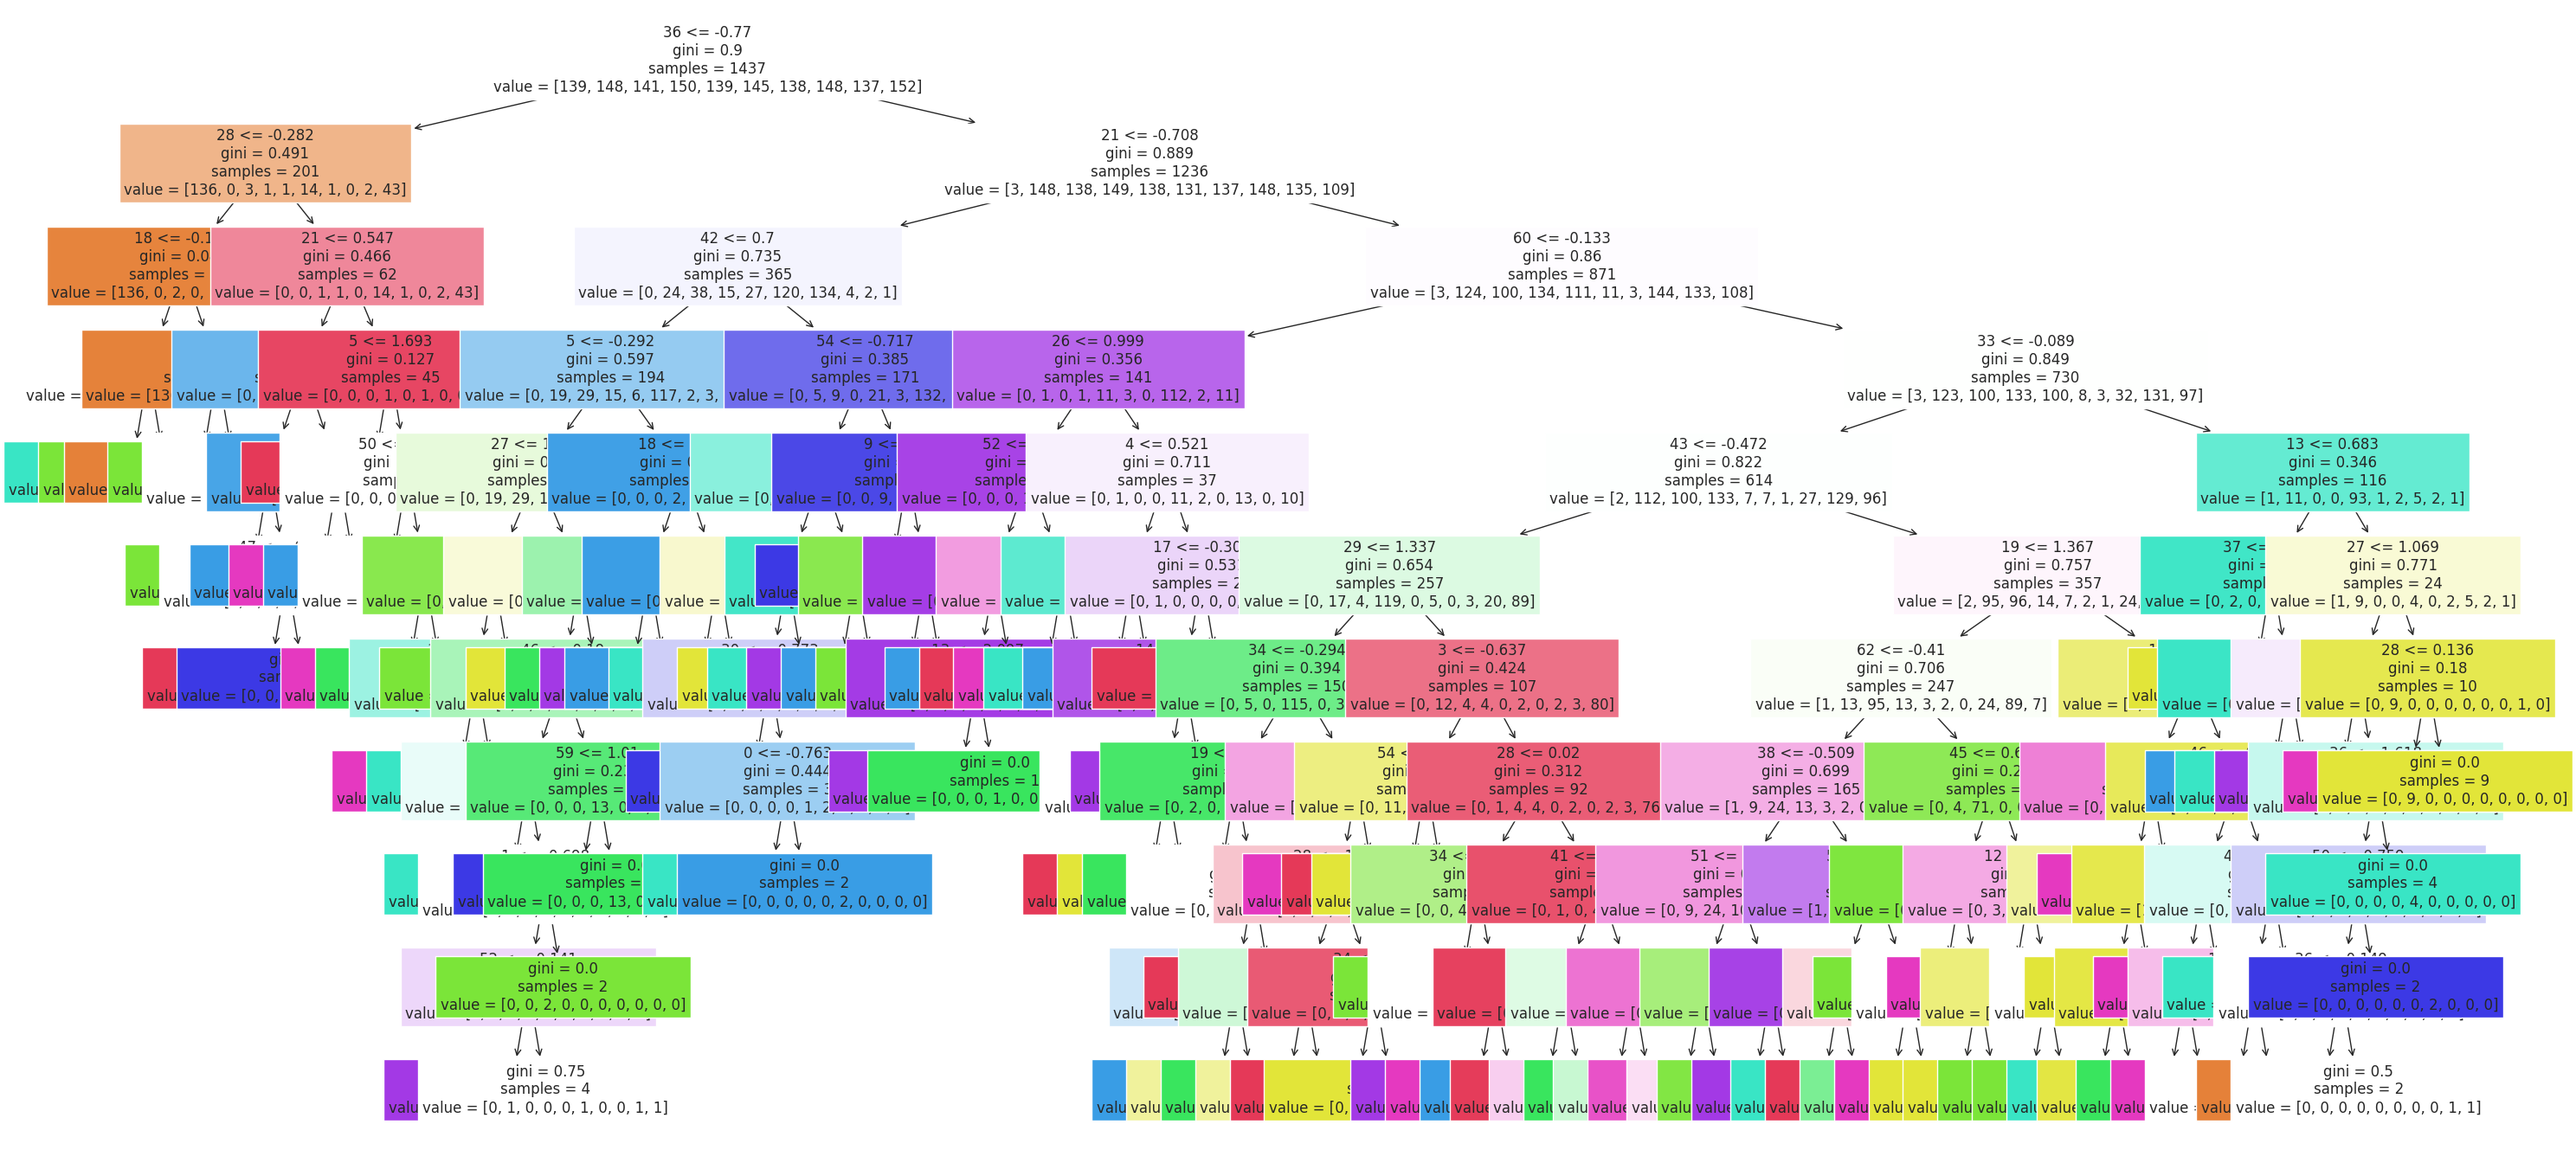

In [25]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (35,17))
tree.plot_tree(model_DT,feature_names = list(range(64)), filled = True,fontsize=12);


Although it doesn't make much sense to us, anyway the above image is a decision tree based on the amount of pixels.


# Boosting

### XGBoost

In [26]:
from xgboost import XGBClassifier
model1 = XGBClassifier(n_estimators=50)
model1.fit(X_train, y_train,eval_metric=f1_score)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
predictions = model1.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.95


### LightGBM

In [28]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10)
model.fit(X_train,y_train,eval_metric=f1_score) #'logloss')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 1437, number of used features: 64
[LightGBM] [Info] Start training from score -2.335839
[LightGBM] [Info] Start training from score -2.273101
[LightGBM] [Info] Start training from score -2.321553
[LightGBM] [Info] Start training from score -2.259678
[LightGBM] [Info] Start training from score -2.335839
[LightGBM] [Info] Start training from score -2.293579
[LightGBM] [Info] Start training from score -2.343059
[LightGBM] [Info] Start training from score -2.273101
[LightGBM] [Info] S

LGBMClassifier(learning_rate=0.09, max_depth=10)

In [29]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Macro F1-score is 0.98


### CatBoost

In [30]:
# First, let's install catboost as it does not comes standard in Google Colab
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [31]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=.3, depth=5, verbose=False)
model.fit(X_train,y_train)

In [32]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.97


###Tuning XGBoost
We can do the tuning procedure manually, but another great way to do this is using GridSearch, checking all combinations. It takes a while but might worth it to get the best results.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
# Create the grid search parameter grid and scoring funcitons
param_grid = {
    "eta": [0.1, 0.01],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2,5,10],
    "n_estimators": [50,100,200],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.3,0.6],}

n_iter=50
grid = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_grid,
    #cv=kfold,
    #scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
)
# fit grid search
%time best_model = grid.fit(X_train,y_train)

CPU times: user 20 s, sys: 2.09 s, total: 22.1 s
Wall time: 14min 54s


In [34]:
predictions = best_model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.96


In [37]:
print('Max depth is: %d ' %best_model.best_estimator_.max_depth)
print('Gamma is: %.2f '  %best_model.best_estimator_.gamma)
print('n_estimator is: %.2f '  %best_model.best_estimator_.n_estimators)

Max depth is: 10 
Gamma is: 0.00 
n_estimator is: 100.00 


# explain how KNN and decision trees can be extended to multi-label classification problems.

Multi-Label KNN (ML-KNN) extends the traditional KNN algorithm by considering the label sets of the k nearest neighbors. Instead of simply assigning the majority class among the neighbors, ML-KNN calculates the probability of each label based on the label distributions of the neighbors. The labels with higher probabilities are assigned to the new instance.

Multi-Label Decision Trees (ML-DT) extend decision trees by constructing multiple decision trees, one for each label. The parent tree determines the presence or absence of a given label, and the child trees further refine the classification for specific label values. This hierarchical structure allows ML-DT to capture complex label relationships.

